<a href="https://colab.research.google.com/github/harsha1-d/harsha1-d/blob/main/Inmemory_Management_Using_Langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install langchain langchain-groq langchain-community

In [5]:
from google.colab import userdata

# Retrieve the raw API key from Colab secrets.
# It appears the stored key might contain extra descriptive text, like 'GROQ- LLAMA API'.
# We will extract only the actual key, assuming it's the last part after a newline.
raw_api_key = userdata.get('GROQ_API_KEY')

# Check if the raw key contains a newline and extract the last part as the actual API key.
if '\n' in raw_api_key:
    api_key = raw_api_key.split('\n')[-1].strip()
else:
    api_key = raw_api_key.strip()

LLAMA_MODEL = "llama-3.3-70b-versatile"

In [6]:
#communicating with LLM using langchain
from langchain_groq import ChatGroq #For OpenAI we have ChatOpenAi
llm = ChatGroq(api_key=api_key, model="llama-3.3-70b-versatile")
#If we use llm.invoke("User Question") we will get the LLM response for this. But we are creating a function for repeated usage here.
def simple_chat_without_memory(user_query):
  response = llm.invoke(user_query)
  return response.content

In [7]:
response1 = simple_chat_without_memory("I want to learn AI")
print(response1)

Learning AI can be a fascinating and rewarding experience. Here's a step-by-step guide to help you get started:

**Prerequisites**

1. **Mathematics**: AI relies heavily on mathematical concepts such as linear algebra, calculus, probability, and statistics. Familiarize yourself with these subjects, especially if you're new to math.
2. **Programming**: Python is a popular language used in AI, so it's essential to have a good grasp of programming concepts, data structures, and algorithms.
3. **Computer Science**: Knowledge of computer science fundamentals, such as data structures, algorithms, and software design patterns, is also important.

**AI Fundamentals**

1. **Introduction to AI**: Start with the basics of AI, including its history, types (e.g., narrow, general, superintelligence), and applications.
2. **Machine Learning**: Learn about machine learning, a subset of AI that involves training algorithms on data to make predictions or decisions.
3. **Deep Learning**: Study deep learn

Now the below conversation does not take the context of the response1 and once again it asks us on what are we planning to learn. This is because we have not provided it with conversation history. Thus it has lost its context. Only with conversation history i will be able to relate between previous and present chat and generate responses with a fullest context. For this we use HumanMessage and AiMessage objects from langchain_core.messages library

In [8]:
response2 = simple_chat_without_memory("Can you give me a learning plan")
print(response2)

I'd be happy to help you create a learning plan. To get started, I'll need to know a bit more about your goals and preferences. Please provide me with the following information:

1. **What subject or skill** do you want to learn? (e.g., programming, language, marketing, etc.)
2. **What is your current level** of knowledge in this subject? (Beginner, Intermediate, Advanced)
3. **What are your goals** for learning this subject? (e.g., get a job, improve skills, personal interest)
4. **How much time** can you dedicate to learning each week?
5. **What is your preferred learning style**? (e.g., online courses, books, videos, practice exercises)
6. **Do you have any specific resources** in mind (e.g., online platforms, textbooks, tutors)?
7. **Are there any specific topics** within the subject that you want to focus on?

Once I have this information, I can help you create a personalized learning plan that suits your needs and goals.

**Example Learning Plan Structure:**

1. **Goal**: [Specif

In [9]:
from langchain.messages import HumanMessage, AIMessage

conversation = []

def simple_chat_with_memory(user_query):
  conversation.append(HumanMessage(content=user_query))
  response = llm.invoke(conversation)
  conversation.append(AIMessage(content = response.content))
  return response.content

In [10]:
response3 = simple_chat_with_memory("I want to learn AI")
print(response3)

Learning AI can be a fascinating and rewarding experience. Here's a comprehensive guide to help you get started:

**Prerequisites**

1. **Mathematics**: Linear Algebra, Calculus, Probability, and Statistics are essential mathematical concepts used in AI.
2. **Programming**: Python is a popular language used in AI, but you can also use R, Java, or C++.
3. **Basic computer science**: Understanding data structures, algorithms, and software design patterns is crucial.

**AI Fundamentals**

1. **Machine Learning (ML)**: Study the basics of ML, including supervised, unsupervised, and reinforcement learning.
2. **Deep Learning (DL)**: Learn about neural networks, convolutional neural networks (CNNs), and recurrent neural networks (RNNs).
3. **Natural Language Processing (NLP)**: Understand the basics of NLP, including text processing, sentiment analysis, and language modeling.

**Learning Resources**

1. **Online Courses**:
	* Coursera: Machine Learning by Andrew Ng
	* edX: Introduction to Ar

In [11]:
print(conversation)

[HumanMessage(content='I want to learn AI', additional_kwargs={}, response_metadata={}), AIMessage(content='Learning AI can be a fascinating and rewarding experience. Here\'s a comprehensive guide to help you get started:\n\n**Prerequisites**\n\n1. **Mathematics**: Linear Algebra, Calculus, Probability, and Statistics are essential mathematical concepts used in AI.\n2. **Programming**: Python is a popular language used in AI, but you can also use R, Java, or C++.\n3. **Basic computer science**: Understanding data structures, algorithms, and software design patterns is crucial.\n\n**AI Fundamentals**\n\n1. **Machine Learning (ML)**: Study the basics of ML, including supervised, unsupervised, and reinforcement learning.\n2. **Deep Learning (DL)**: Learn about neural networks, convolutional neural networks (CNNs), and recurrent neural networks (RNNs).\n3. **Natural Language Processing (NLP)**: Understand the basics of NLP, including text processing, sentiment analysis, and language modeli

In [12]:
response4 = simple_chat_with_memory("Can you give me a learning plan")
print(response4)

Here's a 6-month learning plan for AI, divided into three phases. Each phase focuses on a specific area of AI, and you'll work on projects and exercises to reinforce your learning.

**Phase 1: Foundations (Weeks 1-8)**

1. **Mathematics** (Weeks 1-4):
	* Linear Algebra: Study the basics of linear algebra, including vector spaces, linear transformations, and eigendecomposition.
	* Calculus: Review calculus concepts, including differentiation, integration, and optimization.
	* Probability and Statistics: Study probability distributions, Bayes' theorem, and statistical inference.
	* Resources:
		+ Khan Academy (Linear Algebra, Calculus)
		+ MIT OpenCourseWare (Linear Algebra, Calculus)
		+ edX (Probability and Statistics)
2. **Programming** (Weeks 1-4):
	* Python: Learn Python basics, including data structures, control structures, and object-oriented programming.
	* NumPy, Pandas, and Matplotlib: Study these popular libraries for data analysis and visualization.
	* Resources:
		+ Codecade

Here, in LLM's many users use this conversation history. Due to this same questions with various responses would have been stored in the conversation as a result we might sometimes use the same conversation history to by someother person also. We have not done any session management according to the user yet. To correct this we Lang chain Memory management.In Lang chain Memory management we have ChatPromptTemplate class. we can use this to send the conversation history in a proper format.

In [13]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate(messages=[
    ("system", "You are a helpful persoal assistant"),# in this line we tell what we are going to do with this LLM
    ("human", "{user_query}") #Here we are placing human question
])

#Chaining
chain = prompt | llm # When i invoke the chain variable first the prompt should execute and then its output should go as an input to llm
response_chain = chain.invoke({"user_query": "I have decided to learn AI"})
print(response_chain)

content='Learning AI can be a fascinating and rewarding experience. Artificial Intelligence is a rapidly growing field with numerous applications in various industries, including healthcare, finance, transportation, and more.\n\nTo get started, let\'s break down the key areas of AI:\n\n1. **Machine Learning (ML)**: A subset of AI that involves training algorithms to learn from data and make predictions or decisions.\n2. **Deep Learning (DL)**: A type of ML that uses neural networks to analyze data, often used for image and speech recognition, natural language processing, and more.\n3. **Natural Language Processing (NLP)**: A field of AI that deals with the interaction between computers and humans in natural language.\n4. **Computer Vision**: A field of AI that enables computers to interpret and understand visual data from images and videos.\n\nSome essential skills to learn for AI include:\n\n1. **Programming languages**: Python, R, Java, and C++ are popular choices for AI development.

Even in the above we did not store the conversation history. So now if i ask "Can you give me a learning plan?" the previous quesiton that we asked before, it will not answer properly and would demand full detail again. So we need to..........

In [14]:
prompt_with_memory = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful persoal assistant"),# in this line we tell what we are going to do with this LLM
    ("placeholder", "{chat_history}"), # We are storing the whole chat history here
    ("human", "{user_query}") #Here we are placing human question
])
chain_with_memory = prompt_with_memory | llm

Now we need to go with user session. This is because in the same time as me if some one else is also asking the similar question both of us should not get the same answer. For this the LLM must be able to distinguish the user. For this LLM should know which user is conversing to the LLM and only load the conversation history of that use. For this we use session_id, that describes the user.

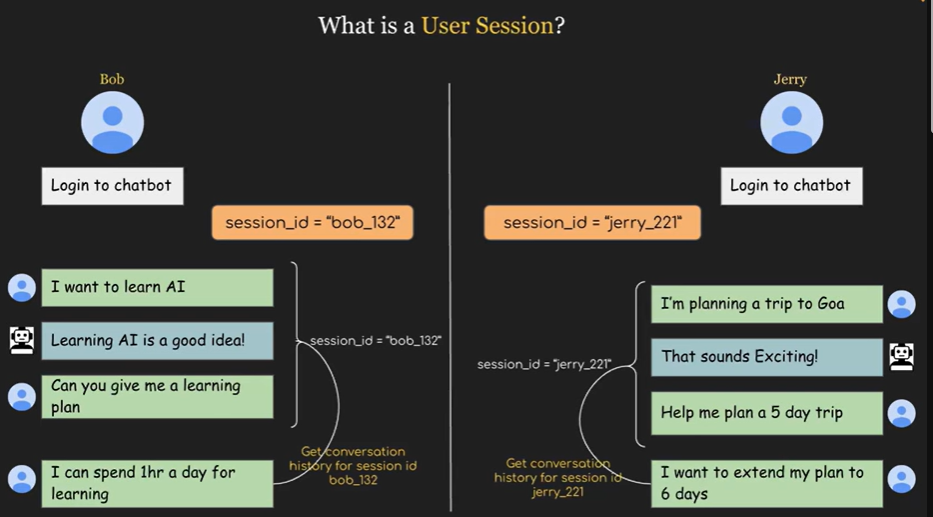

In [19]:
from langchain_community.chat_message_histories import ChatMessageHistory #We'll store all the chat history in ChatMessageHistory.

store = {}
def get_history(session_id: str):
  if session_id not in store:
    store[session_id] = ChatMessageHistory()#If the user starts the 1st ever conversation then he might not be having any chat history. So here we assign the session_id into the store freshly and assign an empty chathistory to it.
  return store[session_id]#If this is not the first chat of the user then we return the whole conversation history to this session_id

In [22]:
from langchain_core.runnables import RunnableWithMessageHistory

chat_with_memory = RunnableWithMessageHistory(
    runnable = chain_with_memory,
    get_session_history = get_history, #get_history is a function that fetches the conversation history of the user. We are yet to build this function.
    input_messages_key="user_query",# tells us where to replace the the user question in the prompt_with_memory ie in "human", "{user_query}"
    history_message_key= "chat_history"#I can get the session history using get_history, but i also need to know on where i should place this history. This parameter helps in this..
)

response = chat_with_memory.invoke({"user_query":"I want to learn AI"}, {"configurable":{"session_id":"user1"}})
print(response)

content='It seems like you\'re interested in learning Artificial Intelligence (AI). I\'d be happy to help you get started.\n\nTo begin with, let\'s break down the field of AI into some key areas:\n\n1. **Machine Learning (ML)**: This involves training algorithms to learn from data and make predictions or decisions. You can explore supervised, unsupervised, and reinforcement learning.\n2. **Deep Learning (DL)**: A subset of ML, DL uses neural networks to analyze data. You can dive into convolutional neural networks (CNNs), recurrent neural networks (RNNs), and long short-term memory (LSTM) networks.\n3. **Natural Language Processing (NLP)**: This area focuses on enabling computers to understand and generate human language. You can explore topics like text processing, sentiment analysis, and language modeling.\n4. **Computer Vision**: This involves teaching computers to interpret and understand visual data from images and videos.\n\nSome recommended resources to learn AI include:\n\n* **

In [24]:
response5 = chat_with_memory.invoke({"user_query":"Can you give me a learning plan"}, {"configurable":{"session_id":"user1"}})
print(response5)

content='I\'d be happy to help you create a learning plan for Artificial Intelligence (AI). Based on our previous conversations, I\'ll provide a tailored plan that suits your interests and goals.\n\n**Step 1: Fundamentals (Weeks 1-4)**\n\n1. **Programming skills**: Ensure you have a solid grasp of programming concepts, data structures, and algorithms. Focus on Python, as it\'s a popular language used in AI.\n2. **Mathematics**: Review linear algebra, calculus, and probability, as these mathematical concepts are crucial in AI.\n3. **Introduction to AI**: Study the basics of AI, including machine learning, deep learning, natural language processing, and computer vision.\n\nRecommended resources:\n\n* Online courses:\n\t+ Andrew Ng\'s Machine Learning course on Coursera\n\t+ Stanford University\'s CS231n: Convolutional Neural Networks for Visual Recognition\n* Books:\n\t+ "Deep Learning" by Ian Goodfellow, Yoshua Bengio, and Aaron Courville\n\t+ "Pattern Recognition and Machine Learning" 

In [26]:
response6 = chat_with_memory.invoke({"user_query":"Can you give me a learning plan"}, {"configurable":{"session_id":"user2"}})
print(response6)

content="I'd be happy to help you with a learning plan. To create an effective plan, I'll need to know a bit more about your goals and interests. Please provide me with the following information:\n\n1. **What subject or topic** do you want to learn about (e.g., programming, language, science, history, etc.)?\n2. **What is your current level** of knowledge in this subject (beginner, intermediate, advanced)?\n3. **What are your goals** for learning this subject (e.g., improve skills, pass a test, enhance career prospects)?\n4. **How much time** can you dedicate to learning each week?\n5. **What is your preferred learning style** (e.g., online courses, books, videos, podcasts, practice exercises)?\n\nOnce I have this information, I can help you create a personalized learning plan that suits your needs and goals.\n\nIf you have any specific requirements or constraints (e.g., limited time, specific resources), please let me know and I'll do my best to accommodate them.\n\nLet's get started!